In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In this project we will be reviewing the pricing of airfare, with a particular focus on the time around the start of the COVID-19 pandemic, looking at the 2 years before and after 2020 to see what trends are discovered.

We will begin by examining the US Average for all airports from Q1 1995 - Q3 2022

In [2]:
df = pd.read_excel("https://github.com/Xanitross/Airfare_Over_Five_Years/blob/main/Quarterly%20national%20level%20domestic%20average%20fare%20series%203Q%202022.xlsx?raw=true")
df

,Year,Quarter,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $)
0,1995,1,296.895553,583.331540
1,1995,2,296.462724,577.378360
2,1995,3,287.514840,557.509831
3,1995,4,287.776292,555.352662
4,1996,1,283.969692,543.056921
...,...,...,...,...
106,2021,3,314.072974,340.233606
107,2021,4,327.137133,349.087623
108,2022,1,328.493121,342.708959
109,2022,2,397.160594,402.381914


First we will be cleaning the data by formating the Quarter column.

In [3]:
df["Quarter"] = "Q" + df["Quarter"].astype(str)
df

,Year,Quarter,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $)
0,1995,Q1,296.895553,583.331540
1,1995,Q2,296.462724,577.378360
2,1995,Q3,287.514840,557.509831
3,1995,Q4,287.776292,555.352662
4,1996,Q1,283.969692,543.056921
...,...,...,...,...
106,2021,Q3,314.072974,340.233606
107,2021,Q4,327.137133,349.087623
108,2022,Q1,328.493121,342.708959
109,2022,Q2,397.160594,402.381914


Now that's been completed we will combine the Quarter + Year columns and then set that as the index for the data.

In [4]:
df["Year"] = df["Year"].astype(str) + " " + df["Quarter"].astype(str)
df.drop("Quarter", inplace=True, axis=1)
df.set_index("Year", inplace=True)
df

,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $)
Year,,
1995 Q1,296.895553,583.331540
1995 Q2,296.462724,577.378360
1995 Q3,287.514840,557.509831
1995 Q4,287.776292,555.352662
1996 Q1,283.969692,543.056921
...,...,...
2021 Q3,314.072974,340.233606
2021 Q4,327.137133,349.087623
2022 Q1,328.493121,342.708959


We will now create a new column in order to look at the difference in price between the recorded costs at that time and what it is after being adjusted for inflation.

In [5]:
df["Average (Difference)"] = df["U.S. Average (Inflation-Adjusted $) "] - df["U.S. Average (Current $) "]
df

,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $),Average (Difference)
Year,,,
1995 Q1,296.895553,583.331540,286.435987
1995 Q2,296.462724,577.378360,280.915637
1995 Q3,287.514840,557.509831,269.994992
1995 Q4,287.776292,555.352662,267.576370
1996 Q1,283.969692,543.056921,259.087229
...,...,...,...
2021 Q3,314.072974,340.233606,26.160632
2021 Q4,327.137133,349.087623,21.950491
2022 Q1,328.493121,342.708959,14.215838


We can now dig into this dataframe and look at the averages for all of the quarters by using the Mean and Median functions of Pandas.

In [6]:
df.mean()

U.S. Average (Current $)                331.081434
U.S. Average (Inflation-Adjusted $)     475.083474
Average (Difference)                    144.002040
dtype: float64

In [7]:
df.median()

U.S. Average (Current $)                329.334222
U.S. Average (Inflation-Adjusted $)     481.503129
Average (Difference)                    126.268212
dtype: float64

We'll now create a graph to chart the cost of airfare over this period. The "Difference from Mean" column will first be removed so we can focus on the essential data in this graph.

<Axes: xlabel='Year'>

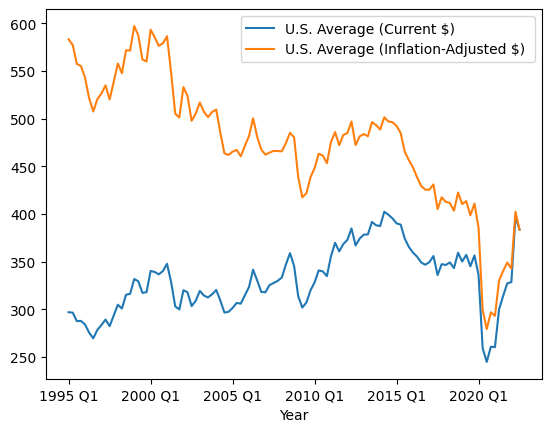

In [8]:
df.drop("Average (Difference)", inplace = True, axis = 1)
df.plot.line()

As we can see, when looking at the inflation-adjusted figured, the price of airfare has been steadily decreasing over time, with a sharp drop in 2020 and then swift recovery.

We will now be looking at a detailed breakdown of that V-shaped dip at the end of the graph by going in depth on the pricing data over the last 5 years.

And as a note, going forward we will only be using the inflation-adjusted $ values, as they will give us the most accurate picture of what is found.

In [9]:
#Creating two variables to help pull data and control our loop
Q = 3
Y = 2022
df = pd.read_excel("https://github.com/Xanitross/Airfare_Over_Five_Years/blob/main/AverageFare_Q"+str(Q)+"_"+str(Y)+".xlsx?raw=true", skiprows=1, nrows=5)
df["Year"] = str(Y) + " Q" + str(Q)
Q -= 1
df


,2021 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2022),2021 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,426.370553,426.370553,981228,2022 Q3
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,375.372806,375.372806,795315,2022 Q3
2,3,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,400.909769,400.909769,768501,2022 Q3
3,4,DEN,Denver International,Denver,CO,345.529835,345.529835,739773,2022 Q3
4,5,EWR,Newark Liberty International,Newark,NJ,420.193271,420.193271,652199,2022 Q3


This is the pricing per quarter for the top 5 most travelled airports.

We will be using a loop to add the remaining data for this 5 year period to the Dataframe.

In [10]:
while Y > 2017:
    df1 = pd.read_excel("https://github.com/Xanitross/Airfare_Over_Five_Years/blob/main/AverageFare_Q"+str(Q)+"_"+str(Y)+".xlsx?raw=true", skiprows=1, nrows=5)
    df1["Year"] = str(Y) + " Q" + str(Q)
    df = df.merge(df1, how="outer")
    Q -= 1
    if Q == 0:
        Q = 4
        Y -= 1
df

,2021 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2022),2021 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,426.370553,426.370553,981228,2022 Q3
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,375.372806,375.372806,795315,2022 Q3
2,3,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,400.909769,400.909769,768501,2022 Q3
3,4,DEN,Denver International,Denver,CO,345.529835,345.529835,739773,2022 Q3
4,5,EWR,Newark Liberty International,Newark,NJ,420.193271,420.193271,652199,2022 Q3
...,...,...,...,...,...,...,...,...,...
90,1,LAX,Los Angeles International,Los Angeles,CA,336.932814,401.412611,981228,2018 Q1
91,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,341.143965,406.429661,795315,2018 Q1
92,3,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,361.163469,430.280355,768501,2018 Q1
93,4,DEN,Denver International,Denver,CO,299.040248,356.268435,739773,2018 Q1


We will now be cleaning the data by removing the unnecessary columns and updating the wordy "Inflation Adjusted Average Fare" column to just being called the "Average Fare".

In [11]:
df.drop("Airport Name", inplace = True, axis = 1)
df.drop("City Name", inplace = True, axis = 1)
df.drop("State Name", inplace = True, axis = 1)
df.drop("Average Fare ($)", inplace = True, axis = 1)
df.drop("2021 Passengers (10% sample)", inplace = True, axis = 1)
df["Average Fare ($)"] = df["Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2022)"]
df.drop("Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2022)", inplace = True, axis = 1)
df

,2021 Passenger Rank,Airport Code,Year,Average Fare ($)
0,1,LAX,2022 Q3,426.370553
1,2,ORD,2022 Q3,375.372806
2,3,ATL,2022 Q3,400.909769
3,4,DEN,2022 Q3,345.529835
4,5,EWR,2022 Q3,420.193271
...,...,...,...,...
90,1,LAX,2018 Q1,401.412611
91,2,ORD,2018 Q1,406.429661
92,3,ATL,2018 Q1,430.280355
93,4,DEN,2018 Q1,356.268435


Our data set will now be sorted by the year, followed by the passenger ranking. This will organize our data to read from the oldest quarter to the newest with the top 5 airports staying in the same order per quarter.

In [12]:
df.sort_values(["Year", "2021 Passenger Rank"], ascending = [True, True], inplace = True)
df.drop("2021 Passenger Rank", inplace = True, axis = 1)
df.set_index("Year", inplace = True)
df

,Airport Code,Average Fare ($)
Year,,
2018 Q1,LAX,401.412611
2018 Q1,ORD,406.429661
2018 Q1,ATL,430.280355
2018 Q1,DEN,356.268435
2018 Q1,EWR,485.595277
...,...,...
2022 Q3,LAX,426.370553
2022 Q3,ORD,375.372806
2022 Q3,ATL,400.909769


Let's now look at the median and mean prices for these specific cities. As we will see, the price for each individual city varies from each other and the overall average that we looked at previously.

In [13]:
df.groupby("Airport Code").mean()

,Average Fare ($)
Airport Code,
ATL,378.492762
DEN,322.045457
EWR,399.937043
LAX,378.024752
ORD,352.563533


In [14]:
df.groupby("Airport Code").median()

,Average Fare ($)
Airport Code,
ATL,412.712428
DEN,339.690774
EWR,424.584433
LAX,393.305517
ORD,381.111673


We will now chart how the airfare price has changed over this five year period at each of these five airports, and how a similar trend is see at each.

<Axes: xlabel='Year'>

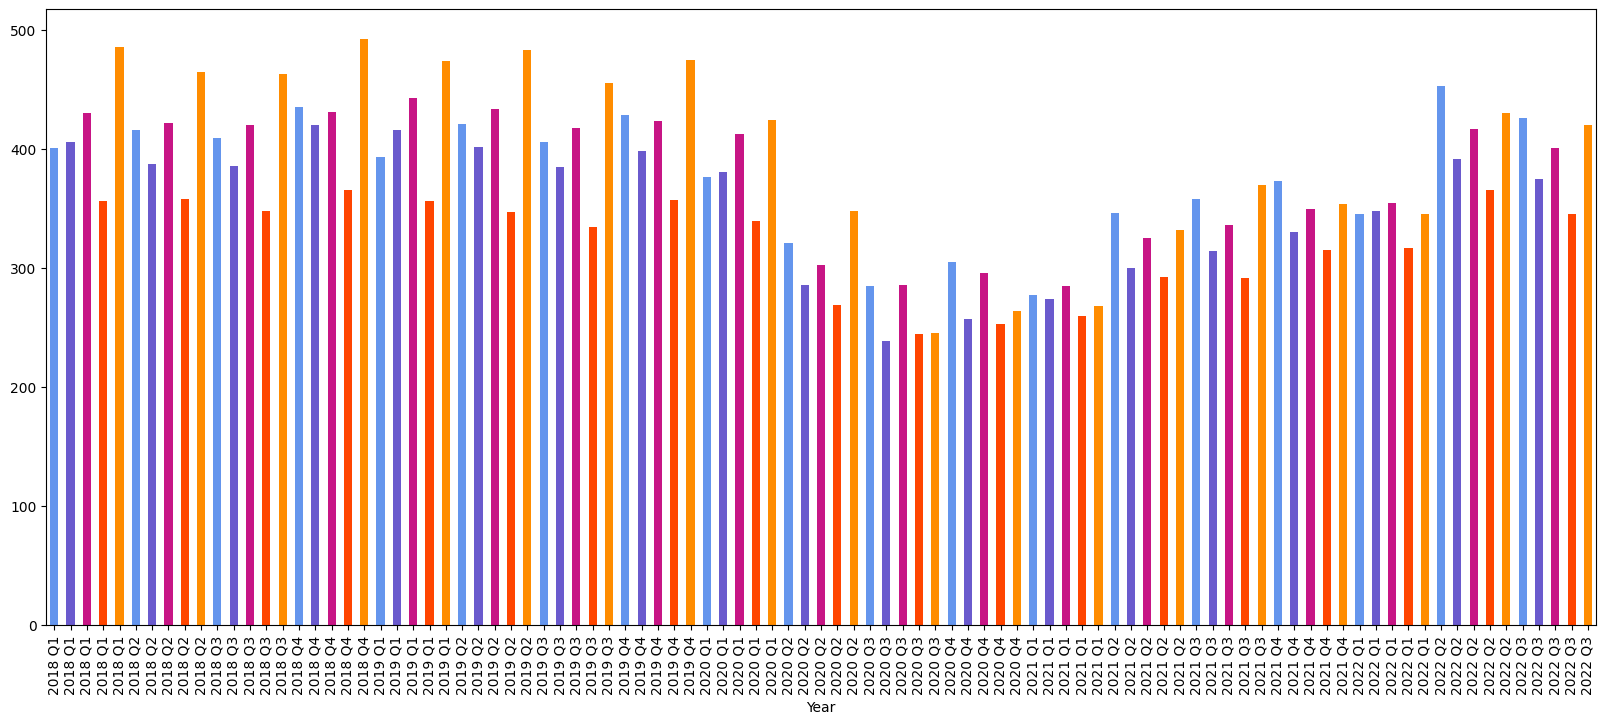

In [24]:
colors = {"ATL" : "mediumvioletred", "DEN" : "orangered", "EWR" : "darkorange", "LAX" : "cornflowerblue", "ORD" : "slateblue"}
df["Average Fare ($)"].plot.bar(figsize=(20,8), color=[colors[i] for i in df["Airport Code"]])

As we can see, all airport, to differing degrees, showed a significant drop in price in 2020 and have since increased, but they are still below pre-2020 levels. We will now look at the data and speculate where this trend could lead us going forward by focusing on just the Atlanta airport.

In [16]:
ATL = df["Airport Code"].isin(["ATL"])
df[ATL]

,Airport Code,Average Fare ($)
Year,,
2018 Q1,ATL,430.280355
2018 Q2,ATL,421.706596
2018 Q3,ATL,420.675710
2018 Q4,ATL,431.531137
2019 Q1,ATL,443.467289
2019 Q2,ATL,434.136023
2019 Q3,ATL,418.280095
2019 Q4,ATL,424.112605
2020 Q1,ATL,412.712428


This next graph will show the pricing over this period for only the Atlanta Airport.

<Axes: xlabel='Year'>

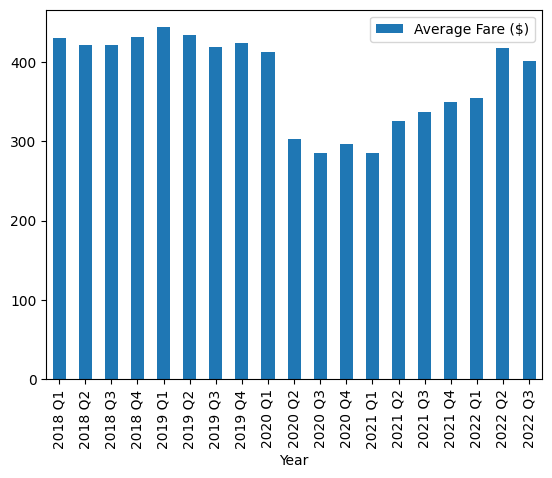

In [17]:
df[ATL].plot.bar()

And now let's look at the specific prices for this airport and how it changes over time, using the mean price that we previously calculated to create a new column.

In [18]:
df["Difference from Mean"] = df["Average Fare ($)"] - 378.492762
df[ATL]

,Airport Code,Average Fare ($),Difference from Mean
Year,,,
2018 Q1,ATL,430.280355,51.787593
2018 Q2,ATL,421.706596,43.213834
2018 Q3,ATL,420.675710,42.182948
2018 Q4,ATL,431.531137,53.038375
2019 Q1,ATL,443.467289,64.974527
2019 Q2,ATL,434.136023,55.643261
2019 Q3,ATL,418.280095,39.787333
2019 Q4,ATL,424.112605,45.619843
2020 Q1,ATL,412.712428,34.219666


By looking at just the "Difference from Mean" column we can see that there is on average a ~$10 average fluctuation from quarter to quarter during normal years, if we discount this difference and only look at the changes beyond that point, we see the first major deviation in Q2 2020 where the price dropped by $100 more than expected, the next significant change happened in Q2 2021 where the price rose by $30 more than expected and then again Q2 2022 where it increased by $40. If we extrapolate form the ending point at Q3 2022 we can likely expect that Q4 2022 to be around $410 average ($32 difference from mean) and then around $400-420 in Q1 2023 ($22-42 difference from mean).